#### A glimpse of our trading floor

![work_at_optiver](https://www.optiver.com/wp-content/uploads/2020/11/WorkingAtOptiver_Hero.jpg)

# Optiver Realized Volatility Prediction

# Introduction
In order to make Kagglers better prepared for this competition, Optiver's data scientists have created a tutorial notebook looping through some financial concepts covered in this particular trading challenge. Also, the data structure and the example code submission will also be presented in this notebook. 

# Order book
The term order book refers to an electronic list of buy and sell orders for a specific security or financial instrument organized by price level. An order book lists the number of shares being bid on or offered at each price point.

Below is a snapshot of an order book of a stock (let's call it stock A), as you can see, all intended buy orders are on the left side of the book displayed as "bid" while all intended sell orders are on the right side of the book displayed as "offer/ask"


![order_book_1](https://www.optiver.com/wp-content/uploads/2021/05/OrderBook3.png)

An actively traded financial instrument always has a dense order book (A liquid book). As the order book data is a continous representation of market demand/supply it is always considered as the number one data source for market research. 

# Trade
An order book is a representation of trading intention on the market, however the market needs a buyer and seller at the **same** price to make the trade happen. Therefore, sometimes when someone wants to do a trade in a stock, they check the order book and find someone with counter-interest to trade with. 

For example, imagine you want to buy 20 shares of a stock A when you have the order book in the previous paragraph. Then you need to find some people who are willing to trade against you by selling 20 shares or more in total. You check the **offer** side of the book starting from the lowest price: there are 221 shares of selling interest on the level of 148. You can **lift** 20 shares for a price of 148 and **guarantee** your execution. This will be the resulting order book of stock A after your trade:

![order_book2](https://www.optiver.com/wp-content/uploads/2021/05/OrderBook4.png)

In this case, the seller(s) sold 20 shares and buyer bought 20 shares, the exchange will match the order between seller(s) and buyer and one trade message will be broadcast to public:

- 20 shares of stock A traded on the market at price of 148.

Similar to order book data, trade data is also extremely crucial to Optiver's data scientists, as it reflects how active the market is. Actually, some commonly seen technical signals of the financial market are derived from trade data directly, such as high-low or total traded volume.

# Market making and market efficiency
Imagine, on another day, stock A's order book becomes below shape, and you, again, want to buy 20 shares from all the intentional sellers. As you can see the book is not as dense as the previous one, and one can say, compared with the previous one, this book is **less liquid**.

![order_book_3](https://www.optiver.com/wp-content/uploads/2021/05/OrderBook5.png)

You could insert an order to buy at 148. However, there is nobody currently willing to sell to you at 148, so your order will be sitting in the book, waiting for someone to trade against it. If you get unlucky, the price goes up, and others start bidding at 149, and you never get to buy at all. Alternatively, you could insert an order to buy at 155. The exchange would match this order against the outstanding sell order of one share at 149, so you buy 1 lot at 149. Similarly, you'd buy 12 shares at a price of 150, and 7 shares at 151. Compared to trying to buy at 148, there is no risk of not getting the trade that you wanted, but you do end up buying at a higher price.

You can see that in such an inefficient market it is difficult to trade, as trading will be more expensive, and if you want quality execution of your orders, you need to deal with higher market risk. That is why investors love liquidity, and market makers like Optiver are there to provide it, no matter how extreme market conditions are.

A market maker is a firm or individual who actively quotes two-sided markets in a security, providing bids and offers (known as asks) along with the market size of each. As a market maker will show both bid and offer orders, an order book with the presence of market maker will be more liquid, therefore a more efficient market will be provided to end investors to trade freely without concern on executions.

# Order book statistics
There are a lot of statistics Optiver data scientist can derive from raw order book data to reflect market liquidity and stock valuation. These stats are proven to be fundamental inputs of any market prediction algorithms. Below we would like to list some common stats to inspire Kagglers mining more valuable signals from the order book data.

Let's come back to the original order book of stock A

![order_book_1](https://www.optiver.com/wp-content/uploads/2021/05/OrderBook3.png)

**bid/ask spread**

As different stocks trade on different level on the market we take the ratio of best offer price and best bid price to calculate the bid-ask spread. 

The formula of bid/ask spread can be written in below form:
$$BidAskSpread = BestOffer/BestBid -1$$

**Weighted averaged price**

The order book is also one of the primary source for stock valuation. A fair book-based valuation must take two factors into account: the level and the size of orders. In this competition we used weighted averaged price, or WAP, to calculate the instantaneous stock valuation and calculate realized volatility as our target. 

The formula of WAP can be written as below, which takes the top level price and volume information into account:

$$ WAP = \frac{BidPrice_{1}*AskSize_{1} + AskPrice_{1}*BidSize_{1}}{BidSize_{1} + AskSize_{1}} $$

As you can see, if two books have both bid and ask offers on the same price level respectively, the one with more offers in place will generate a lower stock valuation, as there are more intended seller in the book, and more seller implies a fact of more supply on the market resulting in a lower stock valuation.

Note that in most of cases, during the continuous trading hours, an order book should not have the scenario when bid order is higher than the offer, or ask, order. In another word, most likely, the bid and ask should never be **in cross.**

In this competition the target is constructed from the WAP. The WAP of the order book snapshot is 147.5317797.

# Log returns

**How can we compare the price of a stock between yesterday and today?**

The easiest method would be to just take the difference. This is definitely the most intuitive way, however **price differences** are not always comparable across stocks. For example, let's assume that we have invested $\$$1000 dollars in both stock A and stock B and that stock A moves from $\$$100 to $\$$102 and stock B moves from $\$$10 to $\$$11. We had a total of 10 shares of A ($\$1000 \ / \ \$100 = 10$) which led to a profit of $10 \cdot (\$102 - \$100) = \$20$ and a total of 100 shares of B that yielded \$100. So the price increase was larger for stock **A**, although the move was proportionally much larger for stock B.

We can solve the above problem by dividing the move by the starting price of the stock, effectively computing the percentage change in price, also known as the **stock return**. In our example, the return for stock A was $\frac{\$102 - \$100 }{\$100} = 2\%$, while for stock B it was $\frac{\$11 - \$10 }{\$10} = 10\%$. The stock return coincides with the percentage change in our invested capital.

Returns are widely used in finance, however **log returns** are preferred whenever some mathematical modelling is required. Calling $S_t$ the price of the stock $S$ at time $t$, we can define the log return between $t_1$ and $t_2$ as:
$$
r_{t_1, t_2} = \log \left( \frac{S_{t_2}}{S_{t_1}} \right)
$$
Usually, we look at log returns over fixed time intervals, so with 10-minute log return we mean $r_t = r_{t - 10 min, t}$.

Log returns present several advantages, for example:
- they are additive across time $r_{t_1, t_2} + r_{t_2, t_3} = r_{t_1, t_3}$
- regular returns cannot go below -100%, while log returns are not bounded

# Realized volatility
When we trade options, a valuable input to our models is the standard deviation of the stock log returns. The standard deviation will be different for log returns computed over longer or shorter intervals, for this reason it is usually normalized to a 1-year period and the annualized standard deviation is called **volatility**. 

In this competition, you will be given 10 minutes of book data and we ask you to predict what the volatility will be in the following 10 minutes. Volatility will be measured as follows:

We will compute the log returns over all consecutive book updates and we define the **realized volatility, $\sigma$,** as the squared root of the sum of squared log returns.
$$
\sigma = \sqrt{\sum_{t}r_{t-1, t}^2}
$$
Where we use **WAP** as price of the stock to compute log returns.

We want to keep definitions as simple and clear as possible, so that Kagglers without financial knowledge will not be penalized. So we are not annualizing the volatility and we are assuming that log returns have 0 mean.

# Competition data
In this competition, Kagglers are challenged to generate a series of short-term signals from the book and trade data of a fixed 10-minute window to predict the realized volatility of the next 10-minute window. The target, which is given in train/test.csv, can be linked with the raw order book/trade data by the same **time_id** and **stock_id**. There is no overlap between the feature and target window.

Note that the competition data will come with partitioned parquet file. You can find a tutorial of parquet file handling in this [notebook](https://www.kaggle.com/sohier/working-with-parquet)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
train = pd.read_csv('optiver-realized-volatility-prediction/train.csv')
train.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


Taking the first row of data, it implies that the realized vol of the **target bucket** for time_id 5, stock_id 0 is 0.004136. How does the book and trade data in **feature bucket** look like for us to build signals?

In [2]:
book_example = pd.read_parquet('optiver-realized-volatility-prediction/book_train.parquet/stock_id=0')
trade_example =  pd.read_parquet('optiver-realized-volatility-prediction/trade_train.parquet/stock_id=0')
stock_id = '0'
book_example = book_example[book_example['time_id']==5]
book_example.loc[:,'stock_id'] = stock_id
trade_example = trade_example[trade_example['time_id']==5]
trade_example.loc[:,'stock_id'] = stock_id

**book data snapshot**

In [3]:
book_example.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,0
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,0
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,0
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0


In [4]:
book_example.shape

(302, 11)

In [5]:
max(book_example['seconds_in_bucket'])

593

**trade date snapshot**

In [6]:
trade_example.head()

,time_id,seconds_in_bucket,price,size,order_count,stock_id
0,5,21,1.002301,326,12,0
1,5,46,1.002778,128,4,0
2,5,50,1.002818,55,1,0
3,5,57,1.003155,121,5,0
4,5,68,1.003646,4,1,0


**Realized volatility calculation in python**

In this competition, our target is to predict short-term realized volatility. Although the order book and trade data for the target cannot be shared, we can still present the realized volatility calculation using the feature data we provided. 

As realized volatility is a statistical measure of price changes on a given stock, to calculate the price change we first need to have a stock valuation at the fixed interval (1 second). We will use weighted averaged price, or WAP, of the order book data we provided.

In [7]:
book_example['wap'] = (book_example['bid_price1'] * book_example['ask_size1'] +
                                book_example['ask_price1'] * book_example['bid_size1']) / (
                                       book_example['bid_size1']+ book_example['ask_size1'])

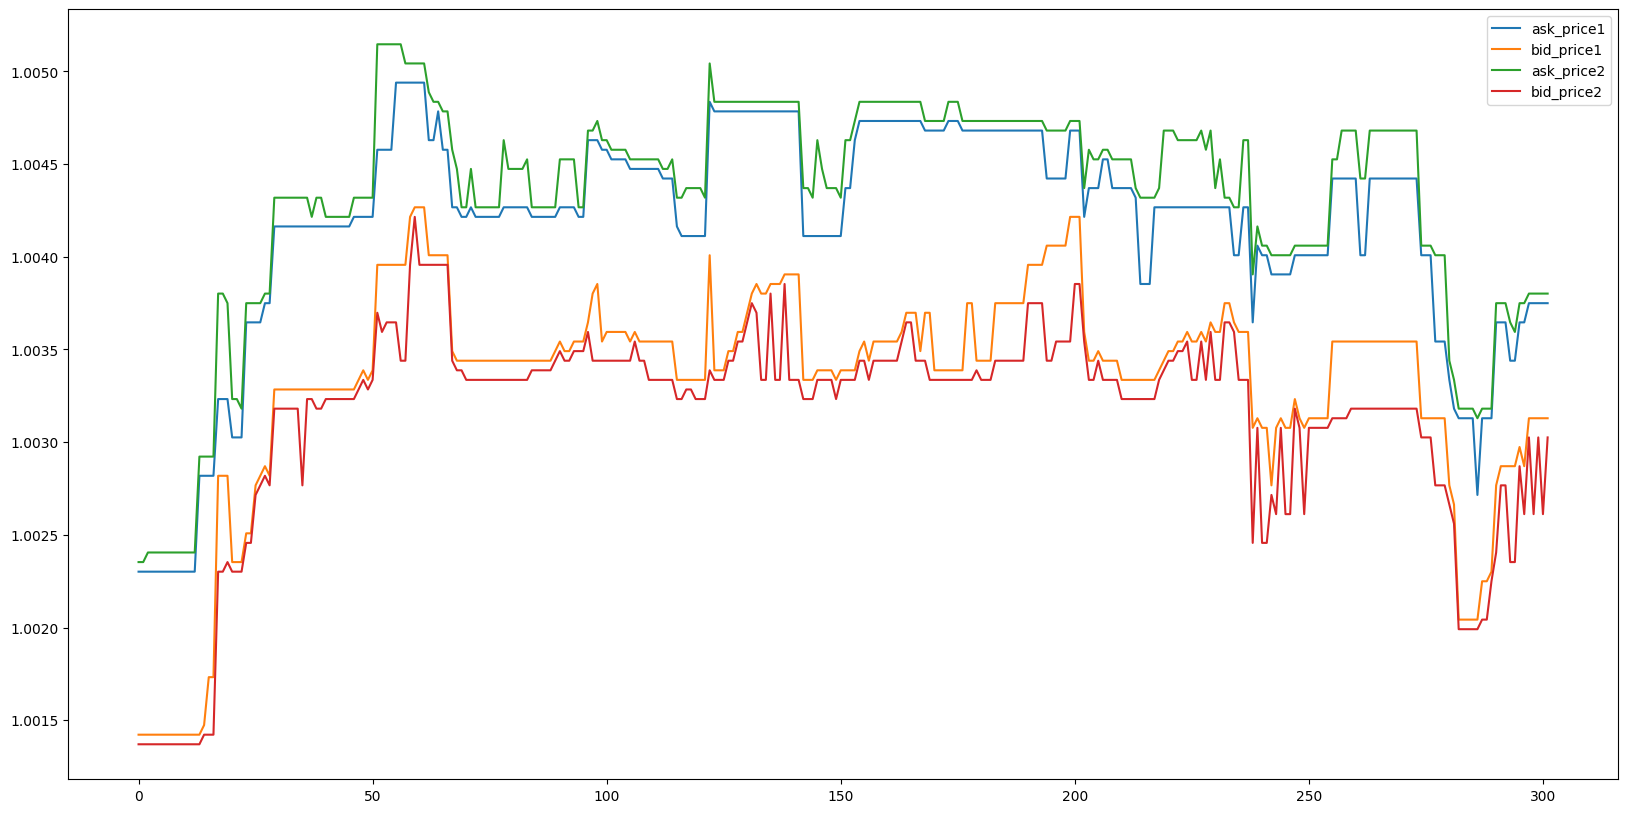

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(book_example["ask_price1"], label='ask_price1')
plt.plot(book_example["bid_price1"], label='bid_price1')
plt.plot(book_example["ask_price2"], label='ask_price2')
plt.plot(book_example["bid_price2"], label='bid_price2')
plt.legend()

**The WAP of the stock is plotted below**

In [9]:
fig = px.line(book_example, x="seconds_in_bucket", y="wap", title='WAP of stock_id_0, time_id_5')
fig.show()

In [10]:
3830*112

428960

In [11]:
train['stock_id'].nunique()

112

In [12]:
train['time_id'].nunique()

3830

To compute the log return, we can simply take **the logarithm of the ratio** between two consecutive **WAP**. The first row will have an empty return as the previous book update is unknown, therefore the empty return data point will be dropped.

In [13]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

In [14]:
book_example.loc[:,'log_return'] = log_return(book_example['wap'])
book_example = book_example[~book_example['log_return'].isnull()]

**Let's plot the tick-to-tick return of this instrument over this time bucket**

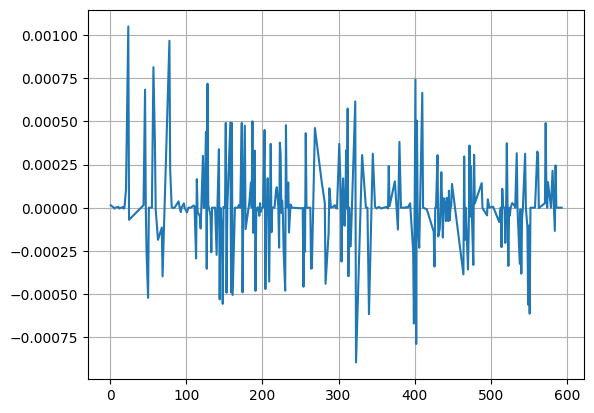

In [15]:
plt.plot(book_example["seconds_in_bucket"],book_example['log_return'])
plt.grid()
plt.savefig("return.png")

In [16]:
fig = px.line(book_example, x="seconds_in_bucket", y="log_return")
fig.show()
fig.write_image("return.png")

The realized vol of stock 0 in this feature bucket, will be:

In [16]:
def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))
realized_vol = realized_volatility(book_example['log_return'])
print(f'Realized volatility for stock_id 0 on time_id 5 is {realized_vol}')

Realized volatility for stock_id 0 on time_id 5 is 0.004499342176374144


In [20]:
train.sample(n=5, random_state=42)

,stock_id,time_id,target
58607,16,9787,0.005983
356864,105,5773,0.002415
197966,58,22076,0.002863
261134,77,5817,0.005279
193238,56,14572,0.002328


# Naive prediction: using past realized volatility as target

A commonly known fact about volatility is that it tends to be autocorrelated. We can use this property to implement a naive model that just "predicts" realized volatility by using whatever the realized volatility was in the initial 10 minutes.

Let's calculate the past realized volatility across the training set to see how predictive a single naive signal can be.

In [17]:
import os
from sklearn.metrics import r2_score
import glob
list_order_book_file_train = glob.glob('optiver-realized-volatility-prediction/book_train.parquet/*')

In [18]:
list_order_book_file_train

['optiver-realized-volatility-prediction/book_train.parquet/stock_id=17',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=28',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=10',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=26',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=19',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=21',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=75',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=81',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=86',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=72',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=44',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=88',
 'optiver-realized-volatility-prediction/book_train.parquet/stock_id=43',
 'optiver-realized-volatility-predicti

As the data is partitioned by stock_id in this competition to allow Kagglers better manage the memory, we try to calculcate realized volatility stock by stock and combine them into one submission file. Note that the stock id as the partition column is not present if we load the single file so we will remedy that manually. We will reuse the log return and realized volatility functions defined in the previous session.

In [19]:
def realized_volatility_per_time_id(file_path, prediction_column_name):
    df_book_data = pd.read_parquet(file_path)
    df_book_data['wap'] =(df_book_data['bid_price1'] * df_book_data['ask_size1']+df_book_data['ask_price1'] * df_book_data['bid_size1'])  / (
                                      df_book_data['bid_size1']+ df_book_data[
                                  'ask_size1'])
    
    df_book_data['log_return'] = df_book_data.groupby(['time_id'])['wap'].transform(log_return)

    df_book_data = df_book_data[~df_book_data['log_return'].isnull()]

    df_realized_vol_per_stock =  pd.DataFrame(df_book_data.groupby(['time_id'])['log_return'].agg(realized_volatility)).reset_index()
    
    df_realized_vol_per_stock = df_realized_vol_per_stock.rename(columns = {'log_return':prediction_column_name})
    stock_id = file_path.split('=')[1]
    df_realized_vol_per_stock['row_id'] = df_realized_vol_per_stock['time_id'].apply(lambda x:f'{stock_id}-{x}')
    return df_realized_vol_per_stock[['row_id',prediction_column_name]]

Looping through each individual stocks, we can get the past realized volatility as prediction for each individual stocks.

In [20]:
def past_realized_volatility_per_stock(list_file,prediction_column_name):
    df_past_realized = pd.DataFrame()
    for file in list_file:
        df_past_realized = pd.concat([df_past_realized,
                                     realized_volatility_per_time_id(file,prediction_column_name)])
    return df_past_realized


df_past_realized_train = past_realized_volatility_per_stock(list_file=list_order_book_file_train,
                                                           prediction_column_name='pred')

Let's join the output dataframe with train.csv to see the performance of the naive prediction on training set.

In [21]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mean_absolute_percentage_error(df_past_realized_train['pred'],train['target'].values), r2_score(df_past_realized_train['pred'],train['target'].values)

(0.8382045275265115, -0.4553753353902299)

In [7]:
train["time_id"].nunique()

3830

In [94]:
train = pd.read_csv('optiver-realized-volatility-prediction/train.csv')

train, test = train_test_split(train, test_size=0.2, random_state=42)

In [24]:
train['row_id'] = train['stock_id'].astype(str) + '-' + train['time_id'].astype(str)
# train = train[['row_id','target']]
df_joined = train.merge(df_past_realized_train[['row_id','pred']], on = ['row_id'], how = 'left')

We will evaluate the naive prediction result by two metrics: RMSPE and R squared. 

In [25]:
from sklearn.metrics import r2_score
def rmspe(y_true, y_pred):
    return  (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))))
R2 = round(r2_score(y_true = df_joined['target'], y_pred = df_joined['pred']),3)
RMSPE = round(rmspe(y_true = df_joined['target'], y_pred = df_joined['pred']),3)
print(f'Performance of the naive prediction: R2 score: {R2}, RMSPE: {RMSPE}')

Performance of the naive prediction: R2 score: 0.628, RMSPE: 0.341


In [97]:
test['row_id'] = test['stock_id'].astype(str) + '-' + test['time_id'].astype(str)
# train = train[['row_id','target']]
df_joined = test.merge(df_past_realized_train[['row_id','pred']], on = ['row_id'], how = 'left')

In [98]:
R2 = round(r2_score(y_true = df_joined['target'], y_pred = df_joined['pred']),3)
RMSPE = round(rmspe(y_true = df_joined['target'], y_pred = df_joined['pred']),3)
print(f'Performance of the naive prediction: R2 score: {R2}, RMSPE: {RMSPE}')

Performance of the naive prediction: R2 score: 0.617, RMSPE: 0.342


The performance of the naive model is not amazing but as a benchmark it is a reasonable start.

# Submission

As a last step, we will make a submission via the tutorial notebook -- through a file written to output folder.  The naive submission scored a RMSPE 0.327 on public LB, the room of improvement is big for sure!

In [ ]:
list_order_book_file_test = glob.glob('optiver-realized-volatility-prediction/book_test.parquet/*')
df_naive_pred_test = past_realized_volatility_per_stock(list_file=list_order_book_file_test,
                                                           prediction_column_name='target')
df_naive_pred_test.to_csv('submission.csv',index = False)

  row_id    target
0    0-4  0.000294


Note that in this competition, there will be only few rows of test data that can be downloaded. The actual evaluation program will run in background after you commit the notebook and manually submit the output. Please check to [code requirement](https://www.kaggle.com/c/optiver-realized-volatility-prediction/overview/code-requirements) for more explanation.

The private leaderboard will be built against the real market data collected after the training period, therefore the public and private leaderboard data will have zero overlap. It will be exciting to get your model tested against the live market! As this competition will provide a very rich dataset representing market microstructure, there is unlimited amount of signals one can come up with. It is all on you, good luck! We at Optiver are really looking forward to learn from the talented Kaggle community!

If you have any question about this notebook or the financial concepts behind it, feel free to ask in the comment section and we will make sure your questions get answered. 

Good luck!

In [93]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_joined, test_size=0.2, random_state=42)

In [ ]:
R2 = round(r2_score(y_true = df_joined['target'], y_pred = df_joined['pred']),3)
RMSPE = round(rmspe(y_true = df_joined['target'], y_pred = df_joined['pred']),3)
print(f'Performance of the naive prediction: R2 score: {R2}, RMSPE: {RMSPE}')